In [422]:
# Comparing RO to INS data

import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

import module
import settings

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16 #32
plt.rcParams['xtick.labelsize'] = 16 #24
plt.rcParams['ytick.labelsize'] = 16 #24
plt.rcParams['legend.fontsize'] = 16 #32
plt.rcParams['text.usetex'] = True
# text
plt.rc("font", family=settings.FONT_FAMILY)

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

In [468]:
# dataset_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/" \
#                "2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"
dataset_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/" \
               "2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/"
INS_relative_poses_path = dataset_path+"motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
RO_relative_poses_path = dataset_path+"motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = dataset_path+"motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"
ERO_relative_poses_path = dataset_path+"motion_estimation/untuned-kalman-with-chi-KFC-labels/radar_motion_estimation.monolithic"


# INS_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
# RO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/enhanced-ro/no_reachback_radar_motion_estimation.monolithic"


# INS - open monolithic and iterate frames
print("reading INS_relative_poses_path: " + INS_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    INS_relative_poses_path)

# iterate mono
INS_se3s = []
INS_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    INS_se3s.append(serialised_transform[0])
    INS_timestamps.append(serialised_transform[1])
    
# RO - open monolithic and iterate frames
print("reading RO_relative_poses_path: " + RO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    RO_relative_poses_path)

# iterate mono
RO_se3s = []
RO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    RO_se3s.append(serialised_transform[0])
    RO_timestamps.append(serialised_transform[1])
    
# ERO - open monolithic and iterate frames
print("reading ERO_relative_poses_path: " + ERO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    ERO_relative_poses_path)
# iterate mono
ERO_se3s = []
ERO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    ERO_se3s.append(serialised_transform[0])
    ERO_timestamps.append(serialised_transform[1])

reading INS_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading RO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading ERO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/untuned-kalman-with-chi-KFC-labels/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2


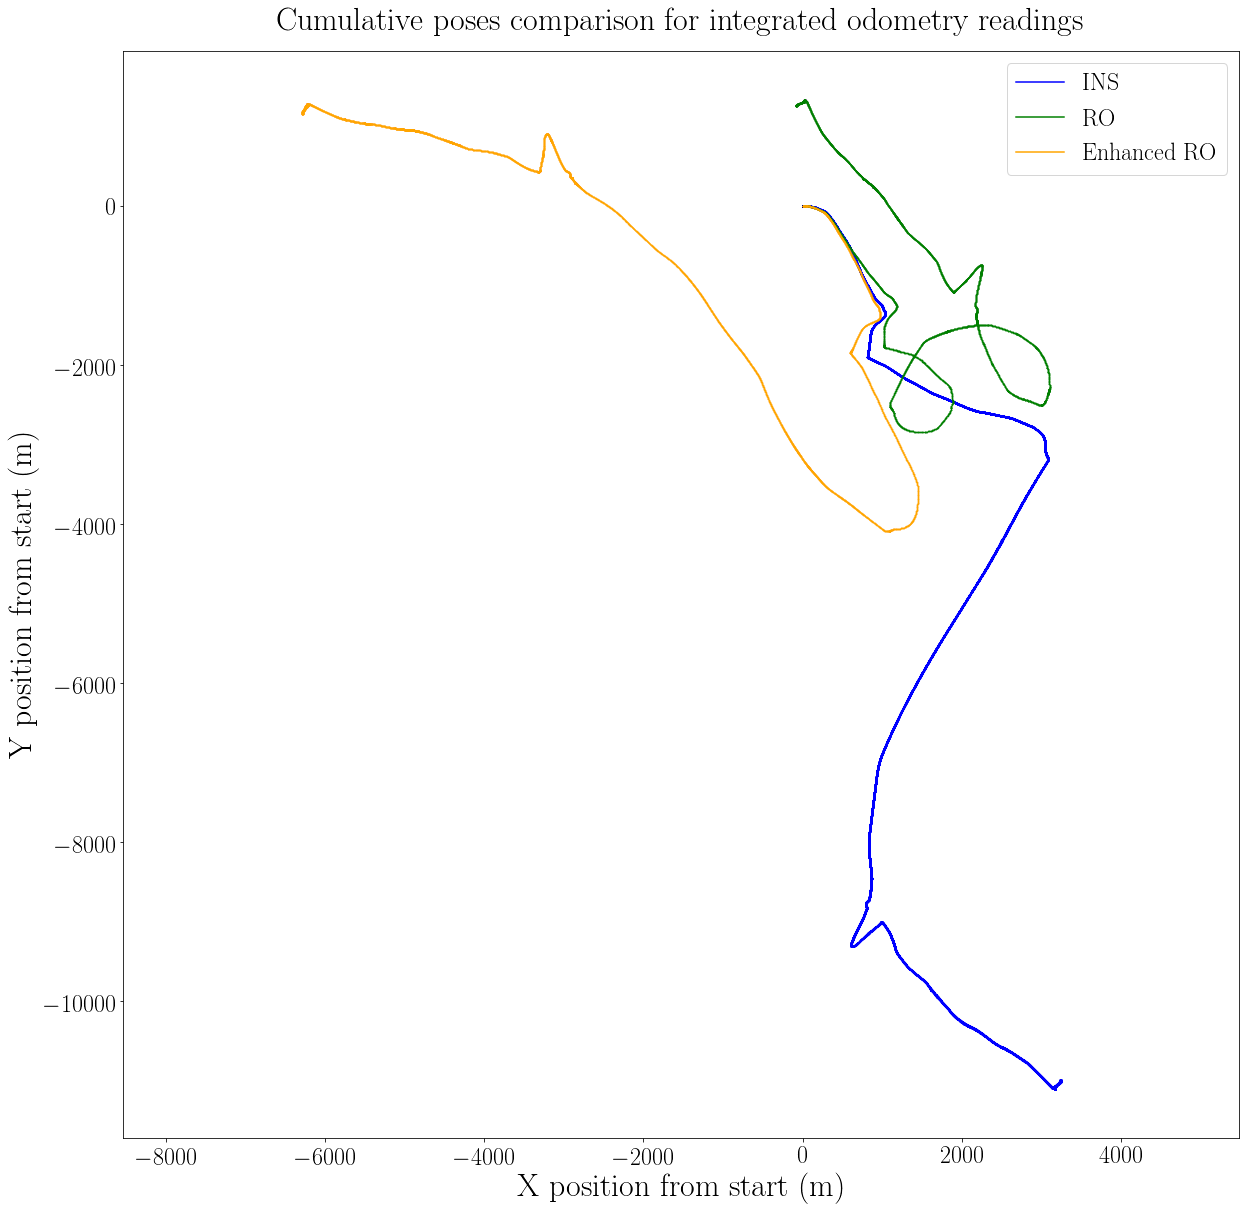

In [469]:
# get INS poses
INS_poses = []
pose = np.identity(4)
for i in range(len(INS_se3s)):
    pose = pose * INS_se3s[i]
    INS_poses.append(pose)

# get x,y coords
x_INS = [pose[0, 3] for pose in INS_poses]
y_INS = [pose[1, 3] for pose in INS_poses]

# get RO poses
RO_poses = []
pose = np.identity(4)
for i in range(len(RO_se3s)):
    pose = pose * RO_se3s[i]
    RO_poses.append(pose)

# get x,y coords
x_RO = [pose[0, 3] for pose in RO_poses]
y_RO = [pose[1, 3] for pose in RO_poses]

# get ERO poses
ERO_poses = []
pose = np.identity(4)
for i in range(len(ERO_se3s)):
    pose = pose * ERO_se3s[i]
    ERO_poses.append(pose)

# get x,y coords
x_ERO = [pose[0, 3] for pose in ERO_poses]
y_ERO = [pose[1, 3] for pose in ERO_poses]

plt.figure(figsize=(20,20))
plt.plot(x_INS,y_INS,'b.',markersize=1);
plt.plot(x_RO,y_RO,'g.',markersize=1);
plt.plot(x_ERO,y_ERO,'.',color='orange',markersize=1);
plt.axis('equal');
plt.title('Cumulative poses comparison for integrated odometry readings',pad=20);
plt.xlabel('X position from start (m)');
plt.ylabel('Y position from start (m)');
line1, = plt.plot([],[],color='blue',label='INS')
line2, = plt.plot([],[],'g',label='RO')
line3, = plt.plot([],[],color='orange',label='Enhanced RO')
plt.legend(handles=[line1,line2,line3],fontsize=24)
plt.savefig(dataset_path+"figs/filename_poses.pdf",bbox_inches='tight',pad_inches = 0)

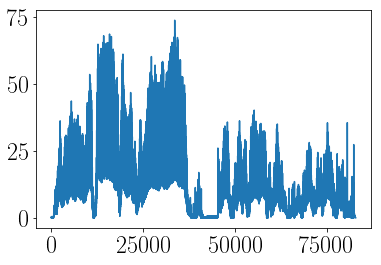

In [495]:
# get INS speeds
assert len(INS_se3s) == len(INS_timestamps)
INS_speeds = []
INS_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(INS_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = INS_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    INS_speeds.append(speed)
    INS_TIMESTAMPS.append(INS_timestamps[i])
plt.plot(INS_speeds);

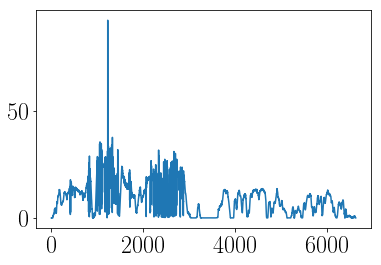

In [496]:
# get speeds
assert len(RO_se3s) == len(RO_timestamps)
RO_speeds = []
RO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(RO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = RO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    RO_speeds.append(speed)
    RO_TIMESTAMPS.append(RO_timestamps[i])
plt.plot(RO_speeds);

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


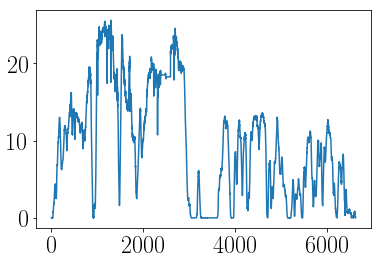

In [497]:
# get speeds
assert len(ERO_se3s) == len(ERO_timestamps)
ERO_speeds = []
ERO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(ERO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = ERO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    ERO_speeds.append(speed)
    ERO_TIMESTAMPS.append(ERO_timestamps[i])
plt.plot(ERO_speeds);

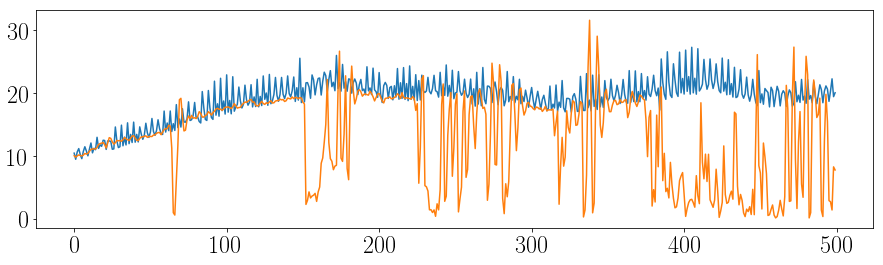

In [473]:
# Do interpolation (accumulatation for now)
interp_INS_speed = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        distance += INS_speeds[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_speed.append(temp_speed)
    distance = 0
plt.figure(figsize=(15,4))
plt.plot(interp_INS_speed[2000:2500])
plt.plot(RO_speeds[2000:2500])

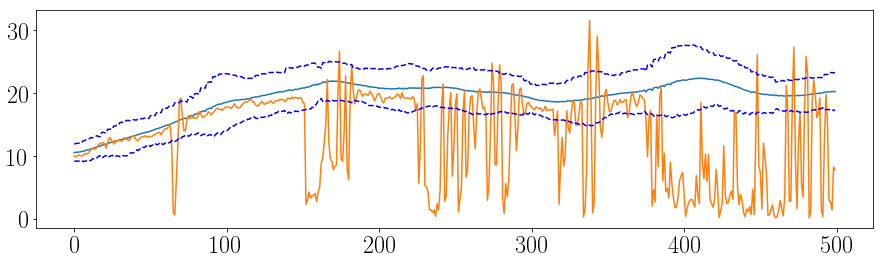

In [474]:
window_size = 20
std_devs = []
means = []
n_sigmas = 2
for i in range(window_size//2,len(interp_INS_speed)-window_size//2):
    window_contents = interp_INS_speed[i-window_size//2:i+window_size//2]
    std_devs.append(std(window_contents))
    means.append(mean(window_contents))
    
means = np.array(means)
means[-window_size//2:] = 0
means = np.roll(means,window_size//2)

std_devs = np.array(std_devs)
std_devs[-window_size//2:] = 0
std_devs = np.roll(std_devs,window_size//2)

plt.figure(figsize=(15,4))
plt.plot(means[2000:2500])
plt.plot(RO_speeds[2000:2500])
plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500])
# plt.plot(RO_speeds[2005:2505])
# plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')

(-5, 100)

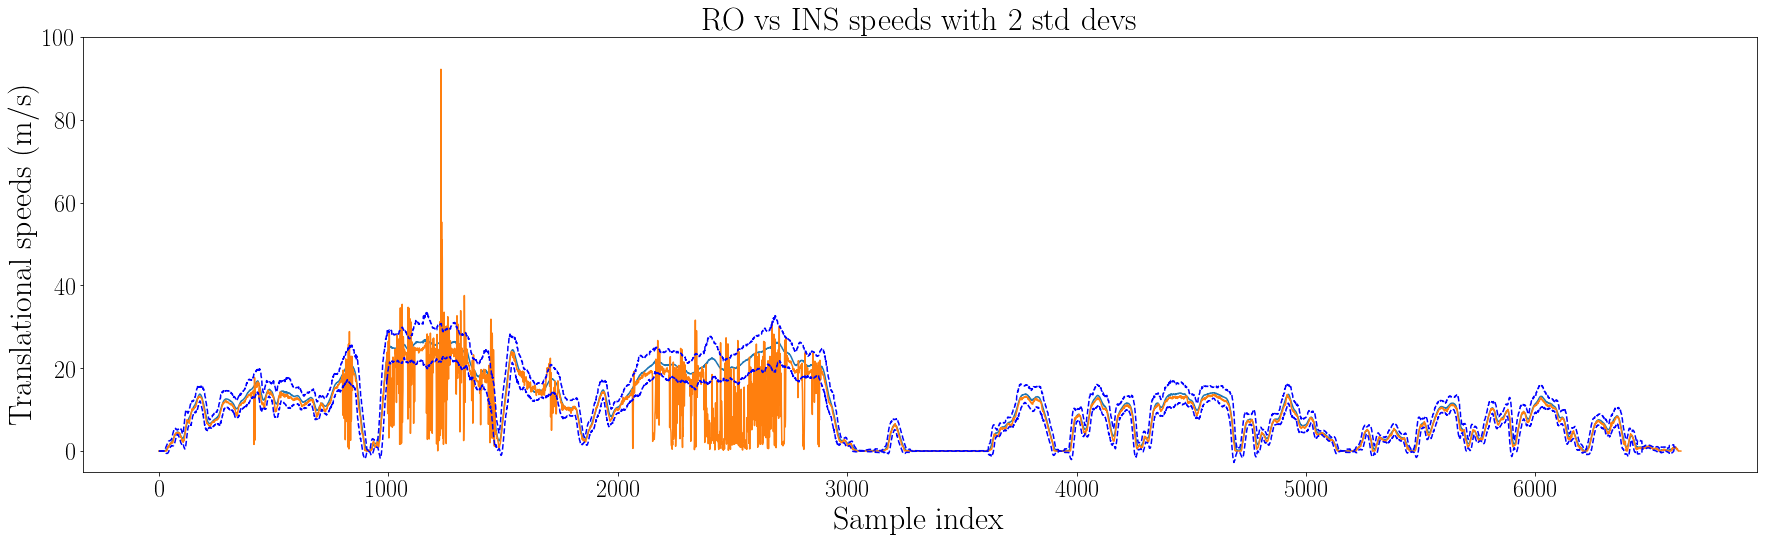

In [475]:
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(RO_speeds)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')
# plt.plot(means+3*std_devs,'k--')
# plt.plot(means-3*std_devs,'k--')
plt.ylim(-5,100)

In [476]:
# Checking for failures based on speeds (not accelerations)
m = len(means)
upper_thresh = means + n_sigmas*std_devs
lower_thresh = means - n_sigmas*std_devs
minimum_speed_to_label = 0.5
label_reach_back = 0
classification = ones(m)*-1
for i in range(m):
    if(RO_speeds[i] < lower_thresh[i]) or RO_speeds[i] > upper_thresh[i]:
        if(means[i] > minimum_speed_to_label):
            classification[i-label_reach_back:i+1] = 1;
#     else:
#         classification[i+window_size//2,] = -1;

array([   2.247018,    2.497982,    2.747116, ..., 1650.4807  ,
       1650.730265, 1650.979883])

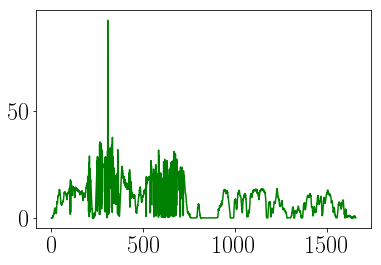

In [477]:
t_ro = np.array([x - RO_TIMESTAMPS[0] for x in RO_TIMESTAMPS])
t_ro = t_ro/1e6
t_ins = t_ro[9:-10]
plt.plot(t_ro,RO_speeds,'g-',markersize=0.5)
t_ins

Detected failures: 695 of 6616 samples


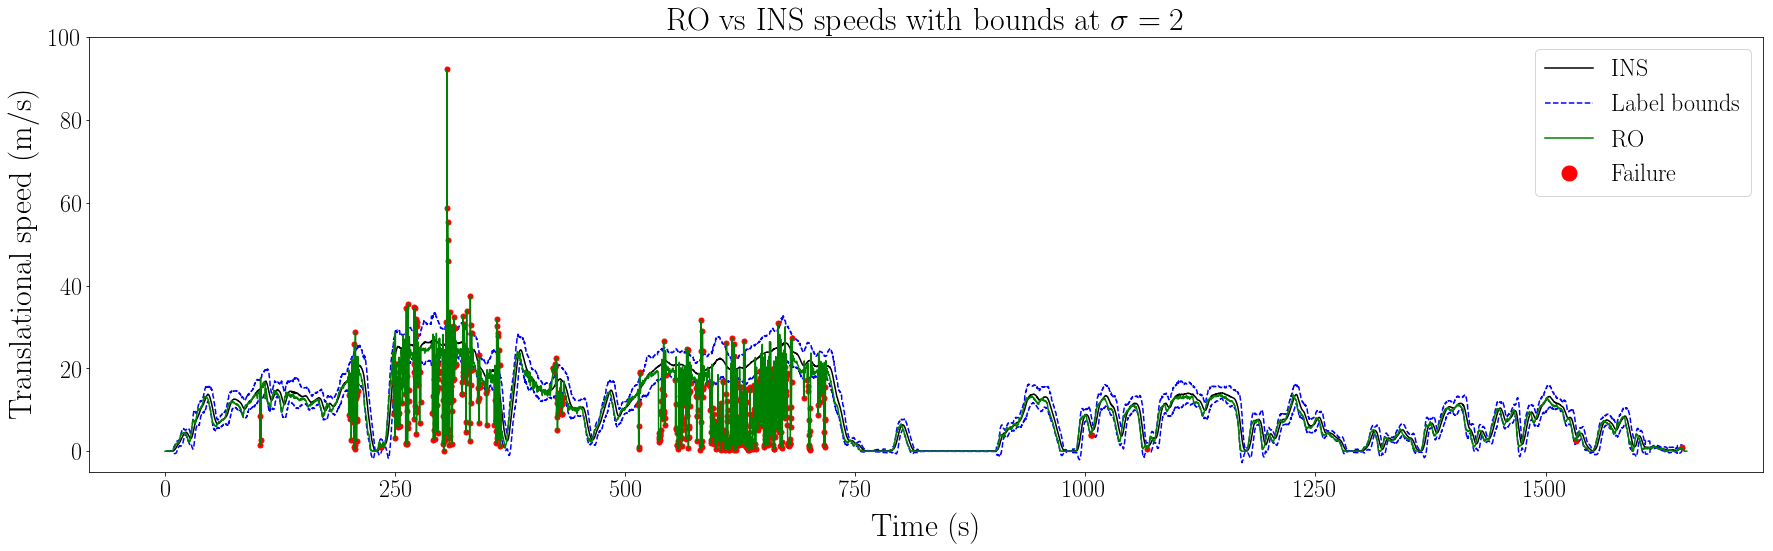

In [478]:
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 32
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with bounds at $\sigma = 2$',fontsize=32)
plt.ylabel('Translational speed (m/s)',labelpad=10)
plt.xlabel('Time (s)',labelpad=10)
plt.plot(t_ins,means,'k')
plt.plot(t_ins,means+n_sigmas*std_devs,'b--')
plt.plot(t_ins,means-n_sigmas*std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(t_ro[i],RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(t_ro,RO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)

line1, = plt.plot([],[],color='black',label='INS')
line2, = plt.plot([],[],'b--',label='Label bounds')
line3, = plt.plot([],[],color='green',label='RO')
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4],fontsize=24)

plt.savefig("/Users/roberto/data/fig1.pdf",bbox_inches='tight',pad_inches = 0)

tally = 0;
for i in range(m):
    if(classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')

In [479]:
plot_poses = False
if(plot_poses == True):
    plt.figure(figsize=(10,10))
    for i in range(m):
        if(classification[i] == 1):
            plt.plot(x_RO[i],y_RO[i],'r.',markersize=2);
        else:
            plt.plot(x_RO[i],y_RO[i],'b.',markersize=0.5);

    plt.axis('equal');
    plt.title('Poses where RO has failure (red) and been within the INS threshold (blue)');
    plt.xlabel('X position from start (m)');
    plt.ylabel('Y position from start (m)');

In [480]:
# Get error indices
labels = [] #zeros(len(EVec_timestamps))
for i in range(m):
    if(classification[i] == 1):
        labels.append(1)
    else:
        labels.append(-1)
print(size(labels))

6616


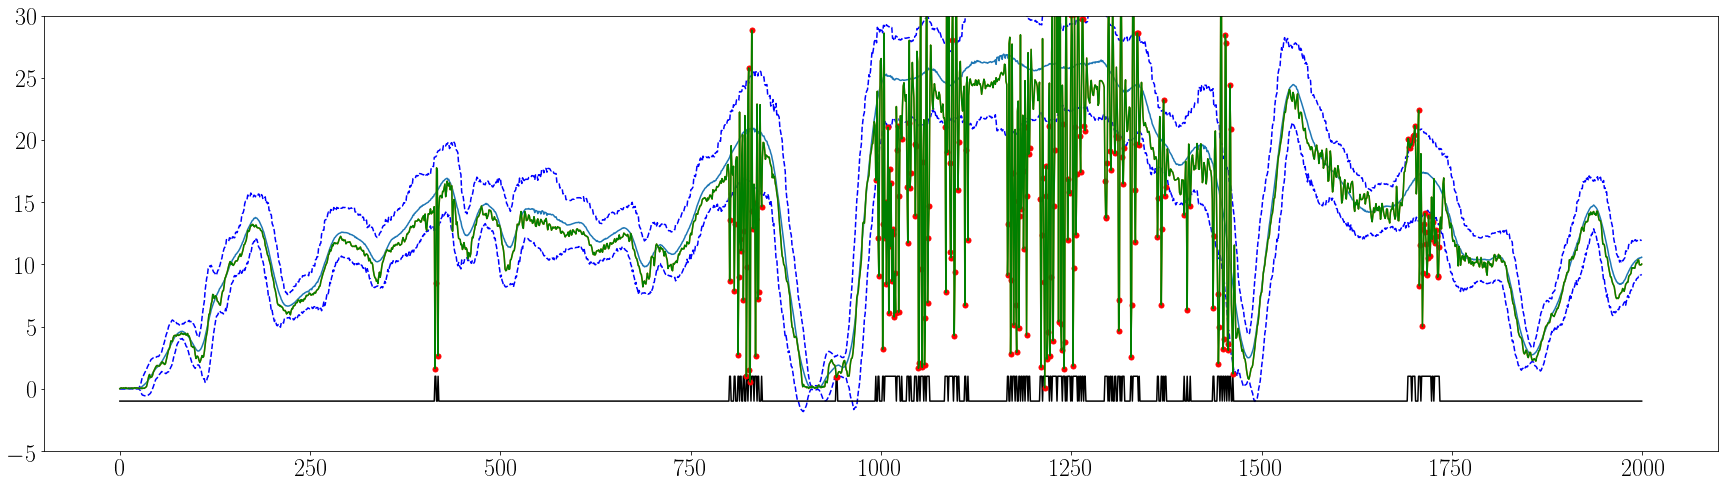

In [481]:
start = 0
finish = 2000
plt.figure(figsize=(30,8))
plt.plot(means[start:finish])
plt.plot(means[start:finish]+n_sigmas*std_devs[start:finish],'b--')
plt.plot(means[start:finish]-n_sigmas*std_devs[start:finish],'b--')
plt.plot(RO_speeds[start:finish]);
plt.plot(labels[start:finish],'k');
for i in range(start,finish):
    if(labels[i] == 1):
        plt.plot(i-start,RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(RO_speeds[start:finish],'g-',markersize=0.5)
plt.ylim(-5,30);

In [482]:
print('Instances of RO failure detection')

tally = 0;
for i in range(start,finish):
    if(labels[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",finish-start,'samples')
        

Instances of RO failure detection
Detected failures: 247 of 2000 samples


Detected failures: 695 of 6616 samples
Detected failures: 109 of 6616 samples


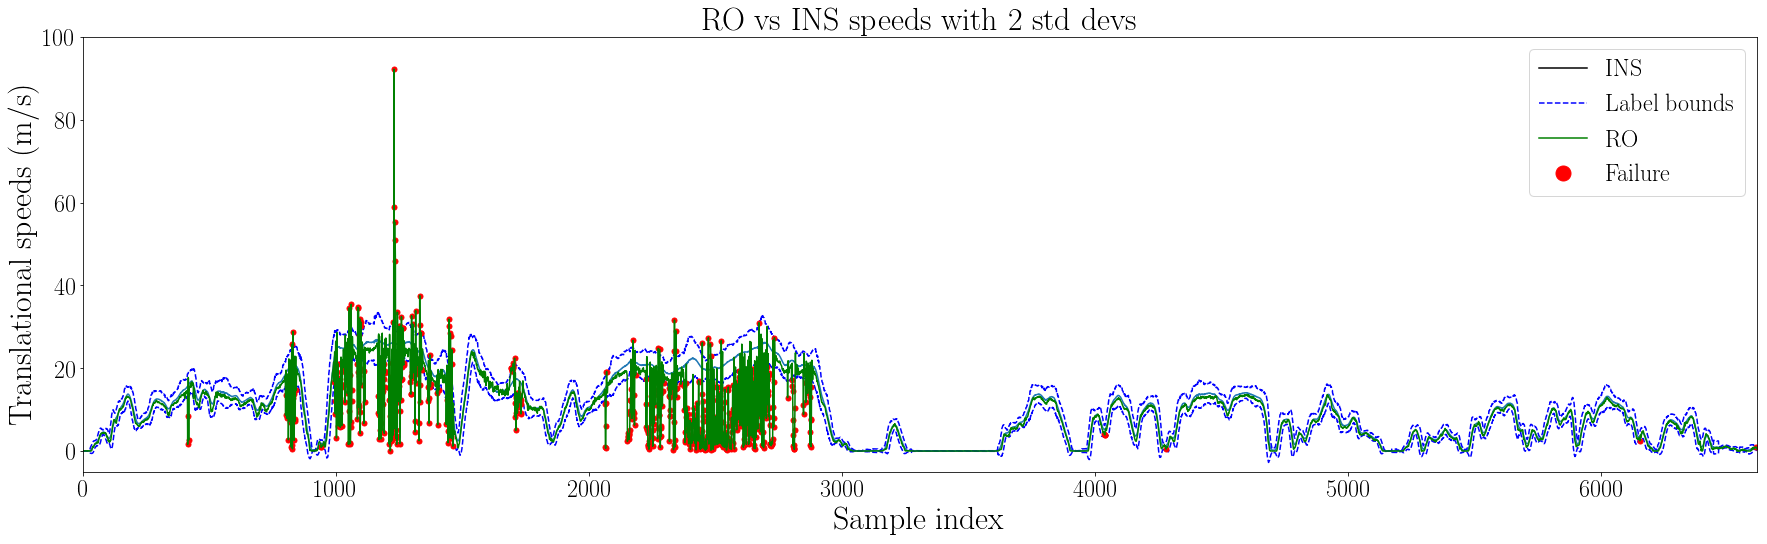

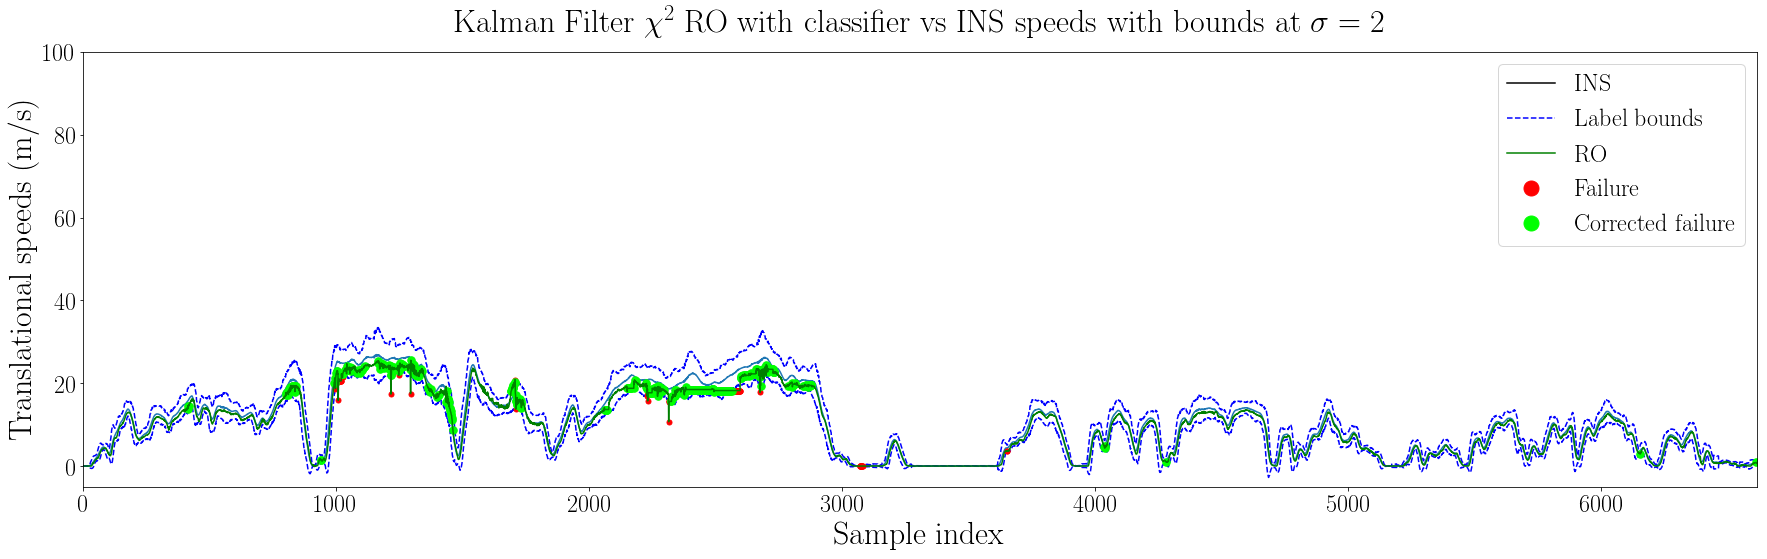

In [494]:
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 32
plt.rcParams['axes.titlesize'] = 32

x_start = 0
x_finish = len(means)
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(i,RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(RO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)
plt.xlim(x_start,x_finish)

line1, = plt.plot([],[],color='black',label='INS')
line2, = plt.plot([],[],'b--',label='Label bounds')
line3, = plt.plot([],[],color='green',label='RO')
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4],fontsize=24)

tally = 0;
for i in range(m):
    if(classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')
plt.savefig(dataset_path+"figs/ro_translational_speeds.pdf",bbox_inches = 'tight',
    pad_inches = 0)

plt.figure(figsize=(30,8))
plt.title('Kalman Filter $\chi^2$ RO with classifier vs INS speeds with bounds at $\sigma = 2$',fontsize=32,pad=20)
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')

# m = len(ERO_TIMESTAMPS)
ERO_classification = ones(m)*-1
for i in range(m-1):
    if(ERO_speeds[i] < lower_thresh[i]) or ERO_speeds[i] > upper_thresh[i] and ERO_speeds[i] > minimum_speed_to_label:
        ERO_classification[i] = 1;

for i in range(m):
    if(ERO_classification[i] == 1):
        plt.plot(i,ERO_speeds[i],'r.-',markersize=10)
for i in range(m):
    if(classification[i] == 1 and ERO_classification[i] == -1):
        plt.plot(i,ERO_speeds[i],'.-',color=[0,1,0],markersize=15)
plt.plot(ERO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)    
plt.xlim(x_start,x_finish)

line1, = plt.plot([],[],color='black',label='INS')
line2, = plt.plot([],[],'b--',label='Label bounds')
line3, = plt.plot([],[],color='green',label='RO')
line4, = plt.plot([],[],'r.',label='Failure',markersize=30)
line5, = plt.plot([],[],'.',color=[0,1,0],label='Corrected failure',markersize=30)
plt.legend(handles=[line1,line2,line3,line4,line5],fontsize=24)

tally = 0;
for i in range(m):
    if(ERO_classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')
plt.savefig(dataset_path+"figs/filename_translational_speeds.pdf",bbox_inches='tight',pad_inches = 0)

In [484]:
# # INS yaw rates
# assert len(INS_se3s) == len(INS_timestamps)
# INS_yaw_rates = []
# INS_TIMESTAMPS = []
# for i in range(len(INS_timestamps) - 1):
#     # work out yaw_rate
#     delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
#         - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
#     se3 = INS_se3s[i]
#     xyzrpy = se3_to_components(se3)
#     yaw_rate = xyzrpy[-1] / delta_time
#     INS_yaw_rates.append(yaw_rate)
#     INS_TIMESTAMPS.append(INS_timestamps[i])
# plt.plot(INS_yaw_rates)

In [485]:
# # RO yaw rates
# assert len(RO_se3s) == len(RO_timestamps)
# RO_yaw_rates = []
# RO_TIMESTAMPS = []
# for i in range(len(RO_timestamps) - 1):
#     # work out yaw_rate
#     delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
#         - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
#     se3 = RO_se3s[i]
#     xyzrpy = se3_to_components(se3)
#     yaw_rate = xyzrpy[-1] / delta_time
#     RO_yaw_rates.append(yaw_rate)
#     RO_TIMESTAMPS.append(RO_timestamps[i])
# plt.plot(RO_yaw_rates)

In [486]:
# # ERO yaw rates
# assert len(ERO_se3s) == len(ERO_timestamps)
# ERO_yaw_rates = []
# ERO_TIMESTAMPS = []
# for i in range(len(ERO_timestamps) - 1):
#     # work out yaw_rate
#     delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
#         - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
#     se3 = ERO_se3s[i]
#     xyzrpy = se3_to_components(se3)
#     yaw_rate = xyzrpy[-1] / delta_time
#     ERO_yaw_rates.append(yaw_rate)
#     ERO_TIMESTAMPS.append(ERO_timestamps[i])
# plt.plot(ERO_yaw_rates)

In [487]:
# plt.figure(figsize=(30,8))
# plt.title('ERO vs INS yaw with 2 std devs')
# plt.ylabel('Yaw rate (rad/s)')
# plt.xlabel('Sample index')
# plt.plot(RO_TIMESTAMPS,RO_yaw_rates,'y',markersize=0.1)
# plt.plot(INS_TIMESTAMPS,INS_yaw_rates,'b')
# # for i in range(m):
# #     if(ERO_classification[i] == 1):
# #         plt.plot(i,ERO_yaw_rates[i],'r.-',markersize=10)
# plt.plot(ERO_TIMESTAMPS,ERO_yaw_rates,'g')
# plt.ylim(-2,2)

In [488]:
# tmp_labels = np.array(labels) + 1
# indices = np.where(tmp_labels) # get indices of failures
# tmp = np.array(RO_speeds)
# ro_fail_vals = tmp[indices]

# tmp_labels = np.array(ERO_classification) + 1
# indices = np.where(tmp_labels) # get indices of failures
# tmp = np.array(ERO_speeds)
# ero_fail_vals = tmp[indices]
# plt.hist(ro_fail_vals,bins=100);
# plt.hist(ero_fail_vals,bins=100);
# plt.title('Histogram of speed value when failure occurs')

In [489]:
tmp_labels = np.array(labels) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_ro_speeds = np.array(RO_speeds)
ro_fail_vals = abs(means[indices] - tmp_ro_speeds[indices]) - n_sigmas*std_devs[indices]
print('Size of RO fails:',len(ro_fail_vals))

tmp_labels = np.array(ERO_classification) + 1
indices = np.where(tmp_labels) # get indices of failures
tmp_ero_speeds = np.array(ERO_speeds)
ero_fail_vals = abs(means[indices] - tmp_ero_speeds[indices])- n_sigmas*std_devs[indices]
# ero_fail_vals[0:400] = 0
print('Size of ERO fails:',len(ero_fail_vals))

Size of RO fails: 695
Size of ERO fails: 109


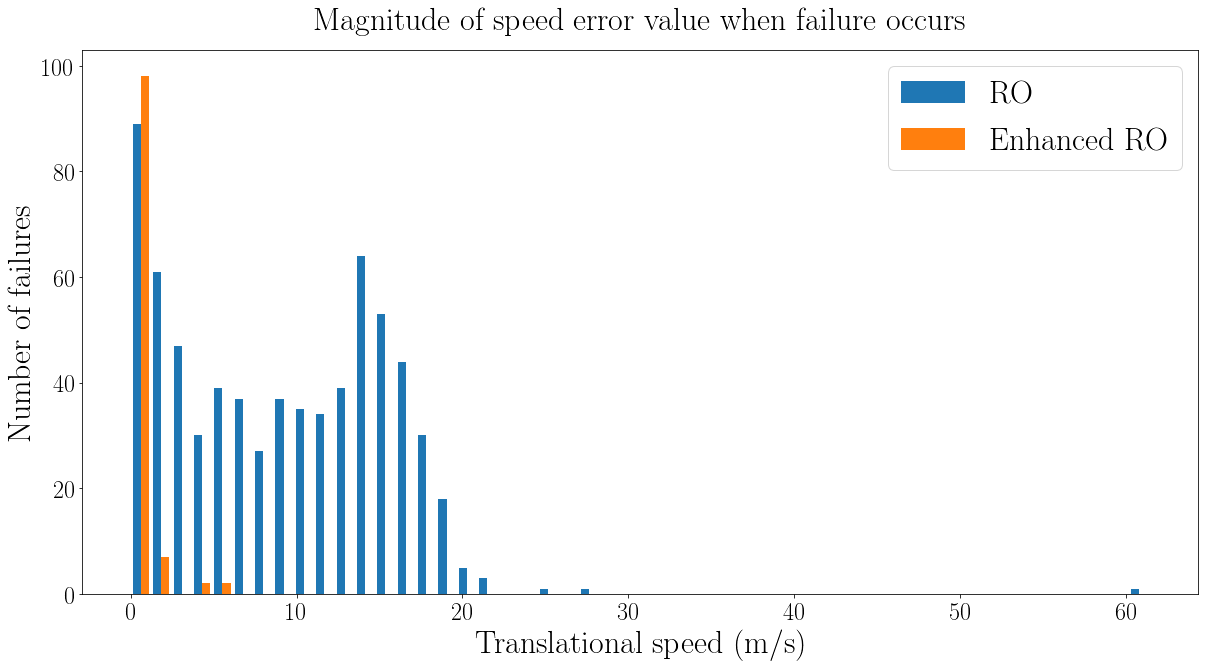

In [493]:
plt.figure(figsize=(20,10))
plt.hist([ro_fail_vals,ero_fail_vals],bins=50,density=False,label=['RO','Enhanced RO']);
plt.legend(loc='upper right')
plt.title('Magnitude of speed error value when failure occurs',fontsize=32,pad=20)
plt.ylabel('Number of failures')
plt.xlabel('Translational speed (m/s)')
plt.savefig(dataset_path+"figs/filename_error_histogram.pdf",bbox_inches='tight',pad_inches = 0)

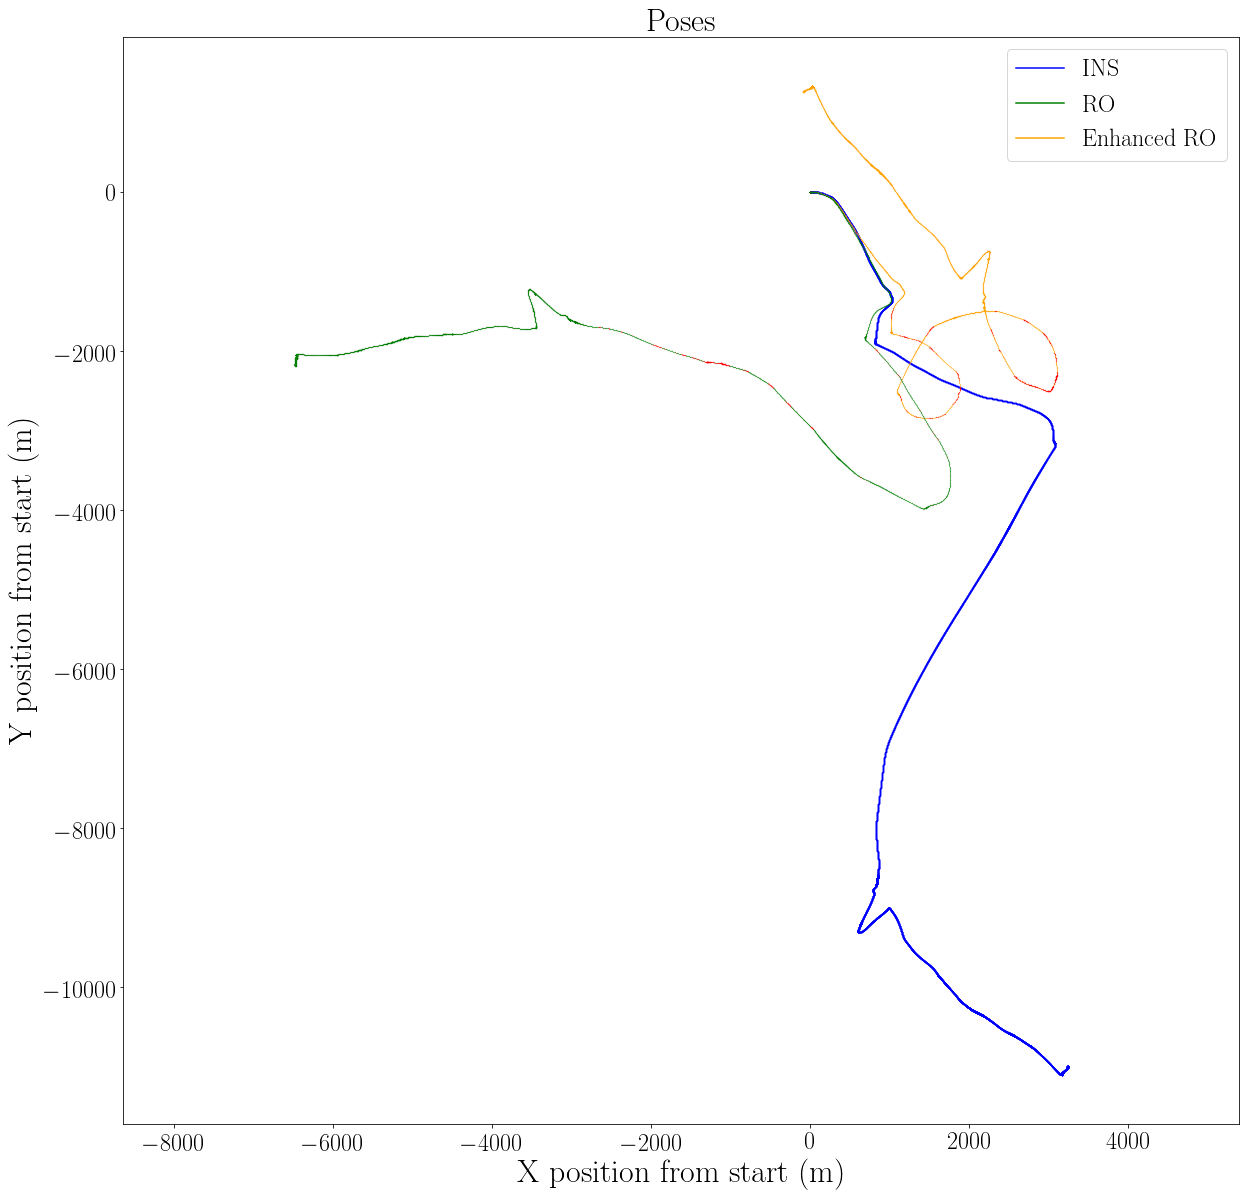

In [465]:
plt.figure(figsize=(20,20))
plt.plot(x_INS,y_INS,'b.',markersize=0.25);

for i in range(m):
    if(classification[i] == -1):
        color = 'orange'
    else:
        color = 'red'
    plt.plot(x_RO[i],y_RO[i],'.',color=color,markersize=0.25);
for i in range(m):
    if(ERO_classification[i] == -1):
        color = 'green'
    else:
        color = 'red'
    plt.plot(x_ERO[i],y_ERO[i],'.',color=color,markersize=0.25);
plt.axis('equal');
plt.title('Poses');
plt.xlabel('X position from start (m)');
plt.ylabel('Y position from start (m)');
line1, = plt.plot([],[],color='blue',label='INS')
line2, = plt.plot([],[],'g',label='RO')
line3, = plt.plot([],[],color='orange',label='Enhanced RO')
plt.legend(handles=[line1,line2,line3],fontsize=24)